### Machine Learning Models
#### Summary
Compare models using barplot
Accuracy score algorithms
1. Logistic regression
2. KNN - K-Nearest Neighbors
3. SVM - Support Vector Machines
4. Naive Bayes - Gaussian Naive Bayes
5. Decision tree
6. Random Forest
7. Confusion Matrices

In [30]:
# import libraries
import numpy as np  # linear algebra
import pandas as pd  # data preparation and processing or data manipulation
import seaborn as sns  # statistical data visualization
import matplotlib.pyplot as plt  # plotting and data visualization
%matplotlib_inline

import graphviz # visualisation of the leaf nodes
# ML library 

# Control display |  Optional
pd.options.display.max_columns=50
sns.set(style= "dargrid", rc={'axes.facecolor': '#616E7C'})

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplotlib_inline` not found.


In [31]:
# Read the dataset
df = pd.read_csv('heart_disease.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [32]:
# Logistic regression || Predict the binary outcomes, either 0 or 1
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [33]:
# Get the mean of the training data
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


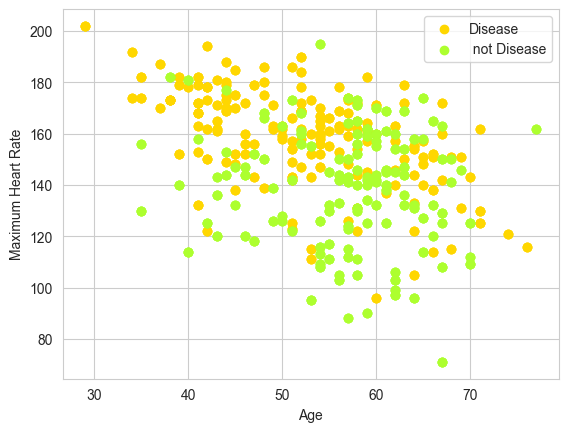

In [34]:
# Create a scatter plot for heart disease vs age and max-heart rate
plt.scatter(x=df.age[df.target ==1], y = df.thalach[df.target == 1], c='#FFD700', label='Disease')
plt.scatter(x=df.age[df.target ==0], y = df.thalach[df.target == 0], c='#ADFF2F', label=' not Disease')

# Add a legend
plt.legend()
# Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# Set the title of the plot
plt.show()

In [35]:
# Create a Logistic regression
# Help to solve problems with classification
# Create the independent variables and dependent variables

y_data = df.target.values
x = df.drop(['target'], axis= 1)

In [36]:
# Normalize the data
x_data = (x - np.min(x)) / (np.max(x)) - np.min(x)

In [37]:
# Split the data 82% training and 18% testing
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.18, random_state=0)

In [38]:
# Transpose matrices
X_train = X_train.T
Y_Train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [39]:
# Get the accuracy using Logistic regression
from sklearn.linear_model import LogisticRegression

accuracy = {}
logreg = LogisticRegression()
logreg.fit(X_train.T, Y_Train.T)
acc = logreg.score(x_test.T, y_test.T)* 100

accuracy['LogisticRegression'] = acc 

# get output
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 73.51%


In [40]:
# Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)  # n_neighbors means k
knn.fit(X_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print('{} NN Score: {:.2f}%'.format(2, knn.score(x_test.T, y_test.T) * 100))

2 NN Score: 95.68%


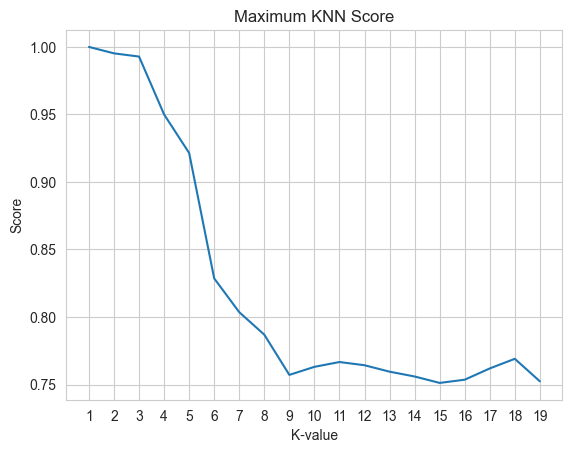

Maximum KNN Score is 100.00%


In [41]:
# Get Maximum KNN score for the model
score_list = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)  # Get n_neighbor means k
    knn2.fit(X_train.T, y_train.T)
    score_list.append(knn2.score(X_train.T, y_train.T))
    
# Show using line plots
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K-value')
plt.ylabel('Score')
plt.title('Maximum KNN Score')
plt.show()

# Get Maximum KNN score for the model in percentage
acc = max(score_list) * 100
accuracy['KNN'] = acc
print('Maximum KNN Score is {:.2f}%'.format(acc))

In [42]:
# Get test accuracy using the SVM algorithm
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train.T, y_train.T)

acc = svm.score(x_test.T, y_test.T) * 100
accuracy["SVM"] = acc
print('Test accuracy of SVM: {:.2f}%'.format(acc))

Test accuracy of SVM: 76.22%


In [43]:
# Get accuracy using the Naive Bayes
from sklearn.naive_bayes import GaussianNB
Nb = GaussianNB()
Nb.fit(X_train.T, y_train.T)

acc = Nb.score(x_test.T, y_test.T) * 100
accuracy['Naive Bayes'] = acc
print('Accuracy of NAive Bayes: {:.2f}%'.format(acc))

Accuracy of NAive Bayes: 84.32%


In [44]:
# Get Accuracy using decision tree model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_test.T, y_test.T)

acc= decision_tree.score(x_test.T, y_test.T) * 100
accuracy["Decision Tree"] = acc
print('Decision Tree Test Accuracy: {:.2f}%'.format(acc))

Decision Tree Test Accuracy: 100.00%


In [45]:
# Get accuracy using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(n_estimators=1000, random_state=1)
randf.fit(X_train.T, y_train.T)

acc= randf.score(x_test.T, y_test.T) * 100
accuracy['Random Forest'] = acc
print('Random Forest Accuracy: {:.2f}%'.format(acc))

Random Forest Accuracy: 100.00%


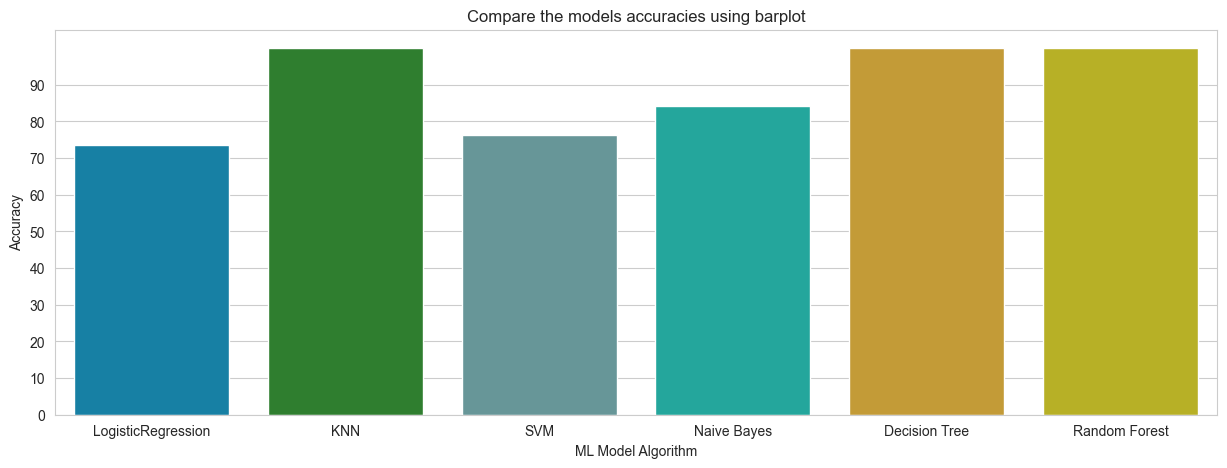

In [46]:
# Compare the models accuracies using the barplot
colors = ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E']
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.yticks(np.arange(0,100,10))
plt.title("Compare the models accuracies using barplot")
plt.ylabel('Accuracy')
plt.xlabel('ML Model Algorithm')
sns.barplot(x=list(accuracy.keys()), y = list(accuracy.values()), palette=colors)
plt.show()

### ML Confusion Matrix || Evaluate the performance of a classification model
__summary__
True Positive(TP); correctly classified as the positive class
True Negative(TN); correctly classified as the negative class
False Positive(FP); incorrectly classified as the positive class
False Negative(FN); incorrectly classified as the negative class
ROC Curve and AUC: ROC(Reciever Operating Characteristic) AUC(Area Under the Curve)

In [47]:
# Get confusion matrices 
# Predicted values
y_head_logreg = logreg.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_Nb = Nb.predict(x_test.T)
y_head_decision_tree = decision_tree.predict(x_test.T)
y_head_randf = randf.predict(x_test.T)

In [48]:
# Import module for confusion matrices
from sklearn.metrics import confusion_matrix

cm_logreg = confusion_matrix(y_test, y_head_logreg)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_Nb = confusion_matrix(y_test, y_head_Nb)
cm_decision_tree = confusion_matrix(y_test, y_head_decision_tree)
cm_randf = confusion_matrix(y_test, y_head_randf)

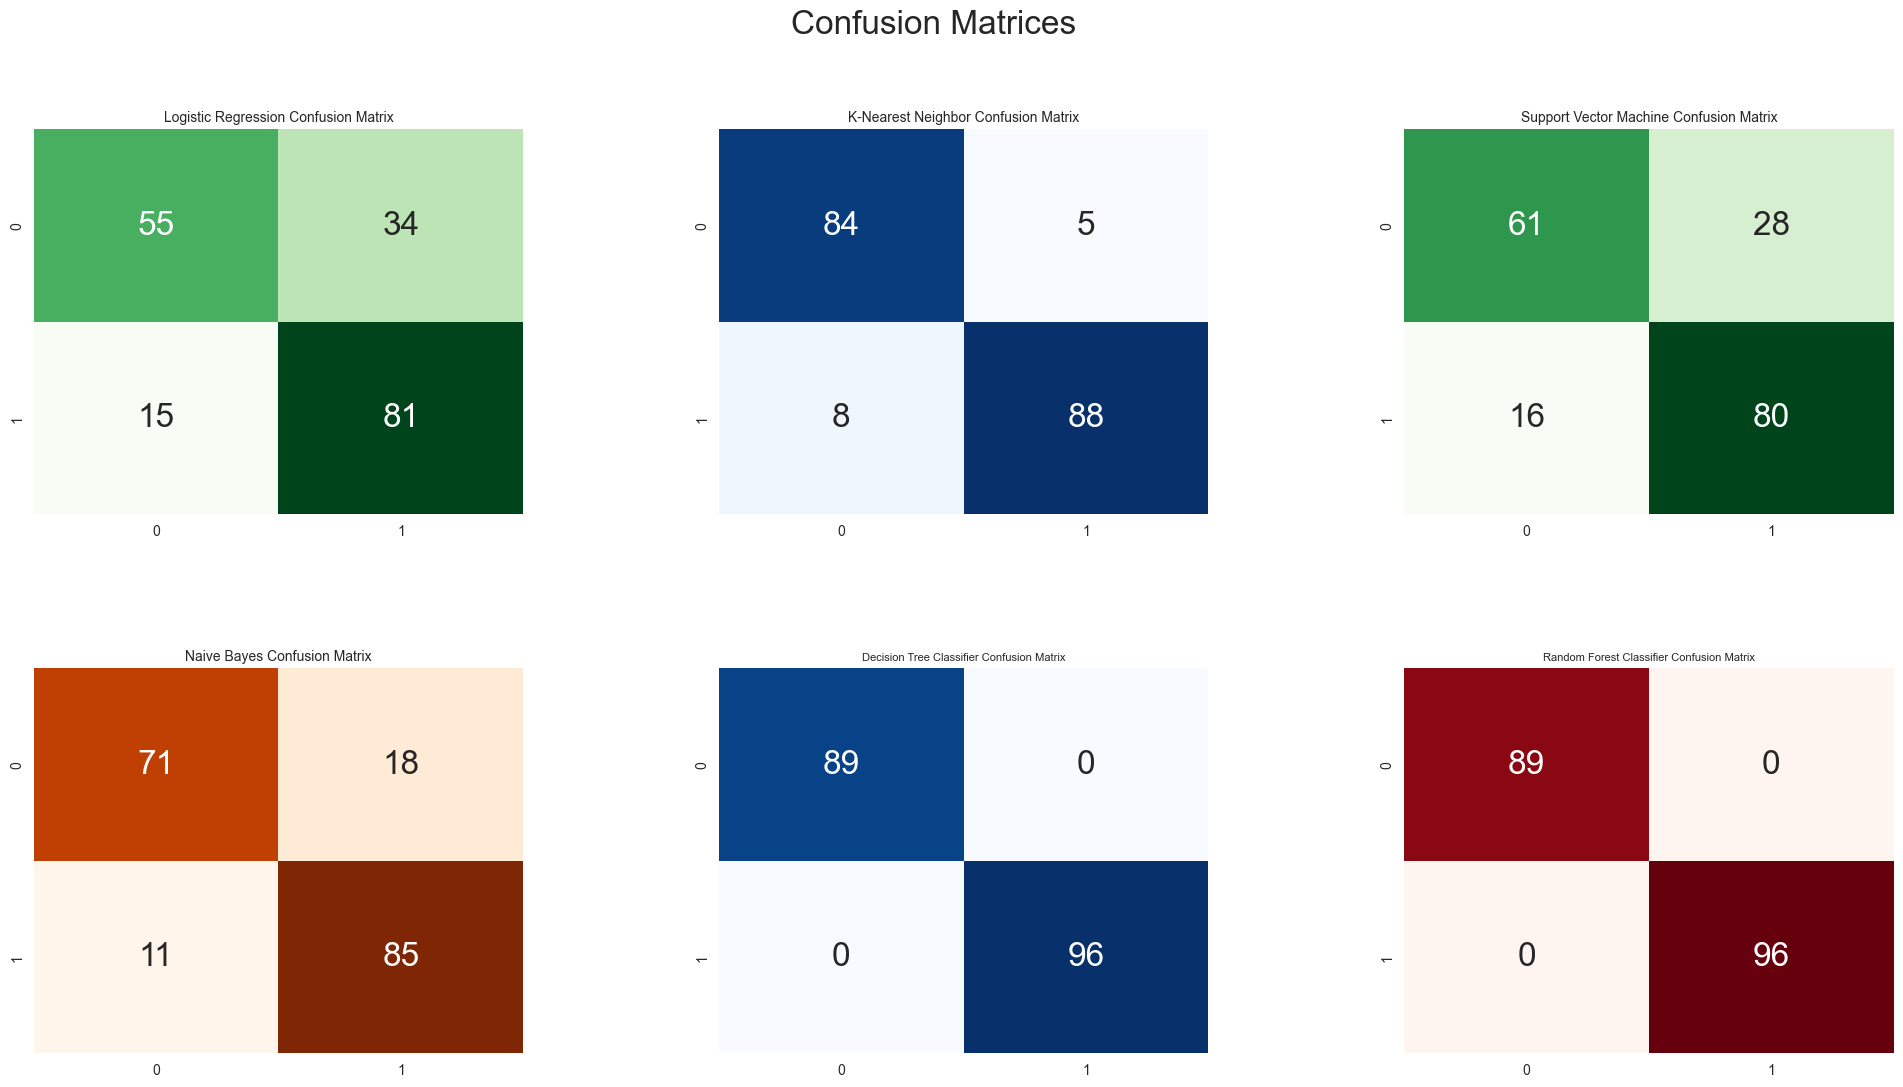

In [56]:
# Plotting Heatmap using the cofusion matrices
plt.figure(figsize=(24,12))

plt.suptitle('Confusion Matrices', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Heatmap plot of the Logistic Regression Confusion Matrix
plt.subplot(2,3,1)
plt.title('Logistic Regression Confusion Matrix', fontsize=10)
sns.heatmap(cm_logreg, annot=True, cmap='Greens', fmt='d', cbar=False, annot_kws={'size': 24})

# Heatmap plot of the K Nearest Neighbor Confusion Matrix
plt.subplot(2,3,2)
plt.title('K-Nearest Neighbor Confusion Matrix', fontsize=10)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

# Heatmap plot of the Support Vector Machine Confusion Matrix
plt.subplot(2,3,3)
plt.title('Support Vector Machine Confusion Matrix', fontsize=10)
sns.heatmap(cm_svm, annot=True, cmap='Greens', fmt='d', cbar=False, annot_kws={'size': 24})

# Heatmap plot of the Naive Bayes Confusion Matrix
plt.subplot(2,3,4)
plt.title('Naive Bayes Confusion Matrix', fontsize=10)
sns.heatmap(cm_Nb, annot=True, cmap='Oranges', fmt='d', cbar=False, annot_kws={'size': 24})

# Heatmap plot of the Decision Tree Classifier Confusion Matrix
plt.subplot(2,3,5)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=8)
sns.heatmap(cm_decision_tree, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

# Heatmap plot of the Random Forest Classifier Confusion Matrix
plt.subplot(2,3,6)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=8)
sns.heatmap(cm_randf, annot=True, cmap='Reds', fmt='d', cbar=False, annot_kws={'size': 24})
plt.show()

The Confusion Matrix allows us to understand how well the model is performing or identify areas of
improvement.
This is used usually when dealing with imbalanced datasets or when different types of errors have 
different types of errors have different consequences